In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState):
    prompt = f'Generate a joke on the topic {state["topic"]}'
    response = model.invoke(prompt).content

    return {'joke' : response}

In [6]:
def explain_joke(state: JokeState):
    prompt = f'Explain the following joke: {state["joke"]}'
    response = model.invoke(prompt).content

    return {'explanation' : response}

In [7]:
from token import STAR


graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('explain_joke', explain_joke)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'explain_joke')
graph.add_edge('explain_joke', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)



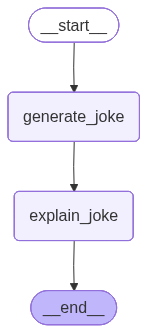

In [8]:
workflow

In [9]:
config1 = {"configurable" : {"thread_id" : "1"}}
workflow.invoke({'topic' : 'programming'}, config=config1)

{'topic': 'programming',
 'joke': 'Why do programmers prefer dark mode? Because light attracts bugs!',
 'explanation': 'This joke is a play on words, using two different meanings of the word "bugs." In programming, bugs refer to errors or glitches in the code that cause problems in a software program. In this context, the joke implies that programmers prefer dark mode because it is easier to spot and fix bugs (errors) in their code when the screen is dark, as opposed to light mode where bugs may be harder to detect. The joke also plays on the idea that bugs (insects) are attracted to light, so by using dark mode, programmers are avoiding attracting bugs (insects) to their workspace.'}

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode? Because light attracts bugs!', 'explanation': 'This joke is a play on words, using two different meanings of the word "bugs." In programming, bugs refer to errors or glitches in the code that cause problems in a software program. In this context, the joke implies that programmers prefer dark mode because it is easier to spot and fix bugs (errors) in their code when the screen is dark, as opposed to light mode where bugs may be harder to detect. The joke also plays on the idea that bugs (insects) are attracted to light, so by using dark mode, programmers are avoiding attracting bugs (insects) to their workspace.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee18d-0dbd-6c3c-8002-4f99095b9610'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T11:37:59.918042+00:00', parent_config={'configurable': {'thread_id': '1', 'c

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode? Because light attracts bugs!', 'explanation': 'This joke is a play on words, using two different meanings of the word "bugs." In programming, bugs refer to errors or glitches in the code that cause problems in a software program. In this context, the joke implies that programmers prefer dark mode because it is easier to spot and fix bugs (errors) in their code when the screen is dark, as opposed to light mode where bugs may be harder to detect. The joke also plays on the idea that bugs (insects) are attracted to light, so by using dark mode, programmers are avoiding attracting bugs (insects) to their workspace.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee18d-0dbd-6c3c-8002-4f99095b9610'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T11:37:59.918042+00:00', parent_config={'configurable': {'thread_id': '1', '

In [12]:
config2 = {"configurable" : {"thread_id" : "2"}}
workflow.invoke({'topic' : 'science'}, config=config2)

{'topic': 'science',
 'joke': "Why do chemists like nitrates so much? Because they're cheaper than day rates!",
 'explanation': 'This joke plays on the similarity in pronunciation between "nitrates" and "night rates." Chemists like nitrates because they are cheaper than day rates, implying that chemists often work late into the night and prefer the cheaper option.'}

In [13]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'science', 'joke': "Why do chemists like nitrates so much? Because they're cheaper than day rates!", 'explanation': 'This joke plays on the similarity in pronunciation between "nitrates" and "night rates." Chemists like nitrates because they are cheaper than day rates, implying that chemists often work late into the night and prefer the cheaper option.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee18d-21a0-6182-8002-093b46253a12'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T11:38:02.003031+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee18d-190b-6878-8001-5389da627309'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'science', 'joke': "Why do chemists like nitrates so much? Because they're cheaper than day rates!"}, next=('explain_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': ''

## Time Travel

In [ ]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0ee18c-fa79-6dc4-bfff-adf72ce6cd81"}})

StateSnapshot(values={}, next=('__start__',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ee18c-fa79-6dc4-bfff-adf72ce6cd81'}}, metadata={'source': 'input', 'step': -1, 'parents': {}}, created_at='2026-01-10T11:37:57.897969+00:00', parent_config=None, tasks=(PregelTask(id='9f136d36-5bb8-0002-9b7b-6b200ae33df7', name='__start__', path=('__pregel_pull', '__start__'), error=None, interrupts=(), state=None, result={'topic': 'programming'}),), interrupts=())

In [17]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0ee18c-fa79-6dc4-bfff-adf72ce6cd81"}})

{'topic': 'programming',
 'joke': 'Why do programmers prefer dark mode? Because the dark side has cookies (and fewer distractions)!',
 'explanation': 'This joke plays on the idea that programmers are often associated with being more tech-savvy and knowledgeable about technology. The reference to "dark mode" is a feature in many programs and devices where the background is dark and the text is light, which some people find easier on the eyes.\n\nThe joke suggests that programmers prefer dark mode not just for its aesthetic appeal, but because it is associated with the "dark side" - a reference to the villains in the Star Wars franchise. The punchline, "Because the dark side has cookies (and fewer distractions)!" is a playful twist on the idea that the dark side, despite its reputation for evil, has enticing benefits like cookies and fewer distractions. This adds a humorous element to the joke, emphasizing the notion that programmers are drawn to dark mode for its practical advantages.'}